In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-55.28982911842202 -46.36236048967092
-28.519870859732507 -175.29121977961435
-55.47065803099254 63.68630149462794
-63.88104197974477 179.19182615788333
60.05022230287241 152.83144864616213
-39.939456056674224 -121.04816472686866
40.29819991049732 105.71139429033047
50.38622180105838 62.781731780106895
54.501511476501435 65.26602517163829
62.39674409759192 -66.03597493867838
44.874606248021905 136.144548198468
-10.574758570374456 126.0583687074045
-19.391698479153618 91.69815639282155
-20.015110371114318 -115.04970519985386
60.134579539149 -22.002004033024463
81.33077537795691 -94.75037367223418
70.35575573146326 115.78713786513288
8.927811125150313 -1.7980843254862293
14.842690636111456 32.934654203544824
-71.73894912102638 68.36033538453253
79.9779537912058 -102.10254347353452
-41.899291907770284 112.62062407343865
-30.380189477013644 -143.32076437067713
86.49401626431282 -108.02652773774493
13.904161445327034 -145.00279371846804
-40.027166833808806 -37.12148455959496
55.610055274778

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | kaitangata
Processing Record 5 of Set 1 | talaya
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | shitanjing
Processing Record 8 of Set 1 | svetlyy
Processing Record 9 of Set 1 | zverinogolovskoye
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | plastun
Processing Record 12 of Set 1 | atambua
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | vestmannaeyjar
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | kintampo
Processing Record 18 of Set 1 | tabat
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | hilo
Processing 

Processing Record 33 of Set 4 | krasnoselkup
Processing Record 34 of Set 4 | falealupo
City not found. Skipping...
Processing Record 35 of Set 4 | morro bay
Processing Record 36 of Set 4 | port-gentil
Processing Record 37 of Set 4 | erzin
Processing Record 38 of Set 4 | sorong
Processing Record 39 of Set 4 | kuah
Processing Record 40 of Set 4 | nyurba
Processing Record 41 of Set 4 | abrau-dyurso
Processing Record 42 of Set 4 | saint-joseph
Processing Record 43 of Set 4 | hay river
Processing Record 44 of Set 4 | mazulskiy
City not found. Skipping...
Processing Record 45 of Set 4 | atbasar
Processing Record 46 of Set 4 | oranjemund
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | kachikau
City not found. Skipping...
Processing Record 49 of Set 4 | pauini
Processing Record 50 of Set 4 | njinikom
Processing Record 1 of Set 5 | mikhaylovsk
Processing Record 2 of Set 5 | ahipara
Processing Record 3 of Set 5 | sungaipenuh
Processing Record 4 of Set 5 | torbay
Processing R

Processing Record 22 of Set 8 | mitchell
Processing Record 23 of Set 8 | matara
Processing Record 24 of Set 8 | peace river
Processing Record 25 of Set 8 | halifax
Processing Record 26 of Set 8 | chhatapur
Processing Record 27 of Set 8 | manfredonia
Processing Record 28 of Set 8 | luau
Processing Record 29 of Set 8 | beni
Processing Record 30 of Set 8 | piste
Processing Record 31 of Set 8 | yulara
Processing Record 32 of Set 8 | gigmoto
Processing Record 33 of Set 8 | mestia
Processing Record 34 of Set 8 | tutoia
Processing Record 35 of Set 8 | pahalgam
Processing Record 36 of Set 8 | myrtle beach
Processing Record 37 of Set 8 | varkaus
Processing Record 38 of Set 8 | forssa
Processing Record 39 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 40 of Set 8 | guderup
Processing Record 41 of Set 8 | soe
Processing Record 42 of Set 8 | sinop
Processing Record 43 of Set 8 | alugan
Processing Record 44 of Set 8 | airai
Processing Record 45 of Set 8 | georgetown
Proce

Processing Record 11 of Set 12 | koubia
Processing Record 12 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 13 of Set 12 | corumba
Processing Record 14 of Set 12 | garowe
Processing Record 15 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 16 of Set 12 | saint-leu
Processing Record 17 of Set 12 | barry
Processing Record 18 of Set 12 | kita
Processing Record 19 of Set 12 | nelson bay
Processing Record 20 of Set 12 | boca do acre
Processing Record 21 of Set 12 | nynashamn
Processing Record 22 of Set 12 | alyangula
Processing Record 23 of Set 12 | baripada
Processing Record 24 of Set 12 | adrar
Processing Record 25 of Set 12 | chongwe
Processing Record 26 of Set 12 | ewa beach
Processing Record 27 of Set 12 | aleksandrov gay
Processing Record 28 of Set 12 | srednekolymsk
Processing Record 29 of Set 12 | waipawa
Processing Record 30 of Set 12 | saint-pierre
Processing Record 31 of Set 12 | china
Processing Record 32 of Set 12 | bairiki
Processing Record 33 of

In [9]:
len(city_data)

547

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,59.09,78,0,5.01,AR,2022-12-29 04:35:04
1,Vaini,-21.2000,-175.2000,77.16,78,75,6.91,TO,2022-12-29 04:35:04
2,Kaitangata,-46.2817,169.8464,74.41,48,44,3.62,NZ,2022-12-29 04:35:05
3,Talaya,61.3833,152.7500,-34.15,100,100,0.38,RU,2022-12-29 04:35:05
4,Rikitea,-23.1203,-134.9692,77.95,67,100,8.77,PF,2022-12-29 04:35:05
5,Shitanjing,39.2342,106.3439,19.18,26,0,3.11,CN,2022-12-29 04:35:06
6,Svetlyy,54.6750,20.1347,42.85,94,100,14.41,RU,2022-12-29 04:35:06
7,Zverinogolovskoye,54.4586,64.8542,3.54,96,100,4.72,RU,2022-12-29 04:35:07
8,Iqaluit,63.7506,-68.5145,6.53,85,75,0.00,CA,2022-12-29 04:30:12
9,Plastun,44.7561,136.2939,16.90,63,8,12.24,RU,2022-12-29 04:35:07


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-12-29 04:35:04,-38.0023,-57.5575,59.09,78,0,5.01
1,Vaini,TO,2022-12-29 04:35:04,-21.2000,-175.2000,77.16,78,75,6.91
2,Kaitangata,NZ,2022-12-29 04:35:05,-46.2817,169.8464,74.41,48,44,3.62
3,Talaya,RU,2022-12-29 04:35:05,61.3833,152.7500,-34.15,100,100,0.38
4,Rikitea,PF,2022-12-29 04:35:05,-23.1203,-134.9692,77.95,67,100,8.77
...,...,...,...,...,...,...,...,...,...
542,Labuhan,ID,2022-12-29 04:49:14,-6.8844,112.2051,81.16,84,100,19.17
543,Millinocket,US,2022-12-29 04:45:54,45.6573,-68.7098,24.42,86,100,0.00
544,Chengde,CN,2022-12-29 04:49:15,40.9725,117.9361,23.13,28,0,9.84
545,Gibara,CU,2022-12-29 04:49:15,21.1097,-76.1317,72.72,84,3,9.53


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

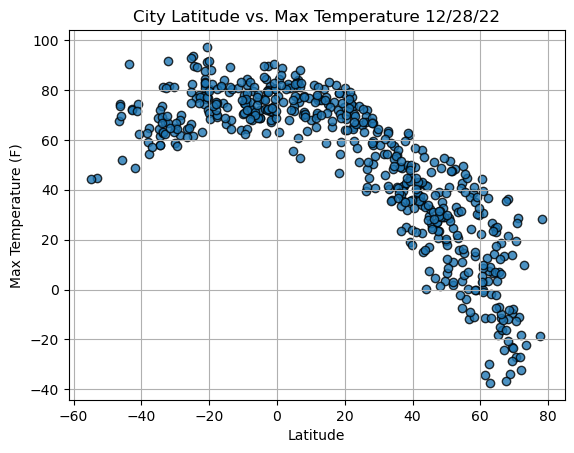

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

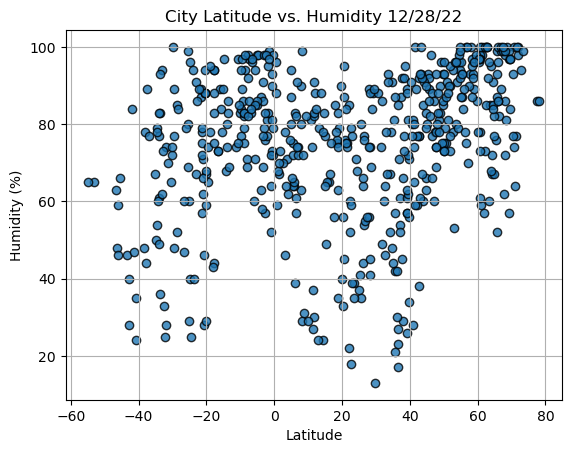

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

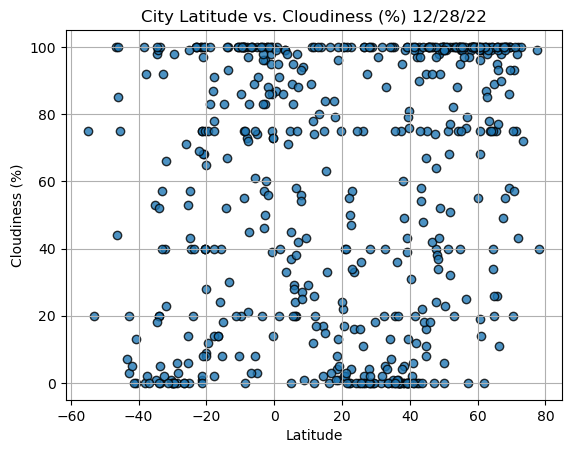

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


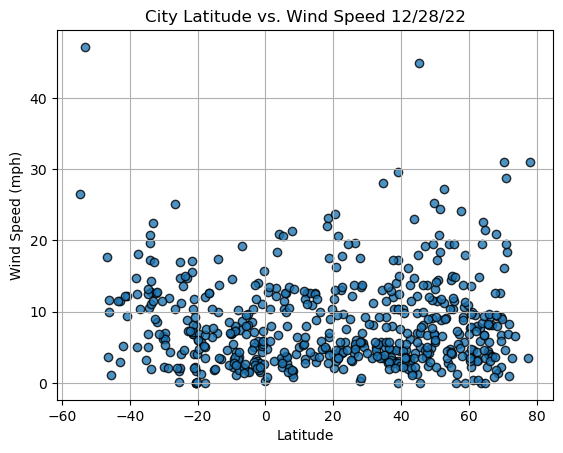

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2022-12-29 04:35:09
Lat                        77.484
Lng                      -69.3632
Max Temp                   -18.56
Humidity                       86
Cloudiness                     99
Wind Speed                   3.49
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
542    False
543     True
544     True
545     True
546    False
Name: Lat, Length: 547, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Talaya,RU,2022-12-29 04:35:05,61.3833,152.7500,-34.15,100,100,0.38
5,Shitanjing,CN,2022-12-29 04:35:06,39.2342,106.3439,19.18,26,0,3.11
6,Svetlyy,RU,2022-12-29 04:35:06,54.6750,20.1347,42.85,94,100,14.41
7,Zverinogolovskoye,RU,2022-12-29 04:35:07,54.4586,64.8542,3.54,96,100,4.72
8,Iqaluit,CA,2022-12-29 04:30:12,63.7506,-68.5145,6.53,85,75,0.00


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

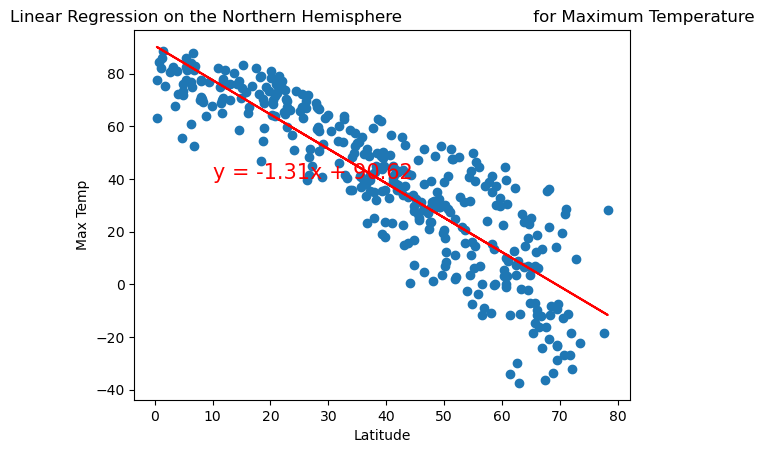

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

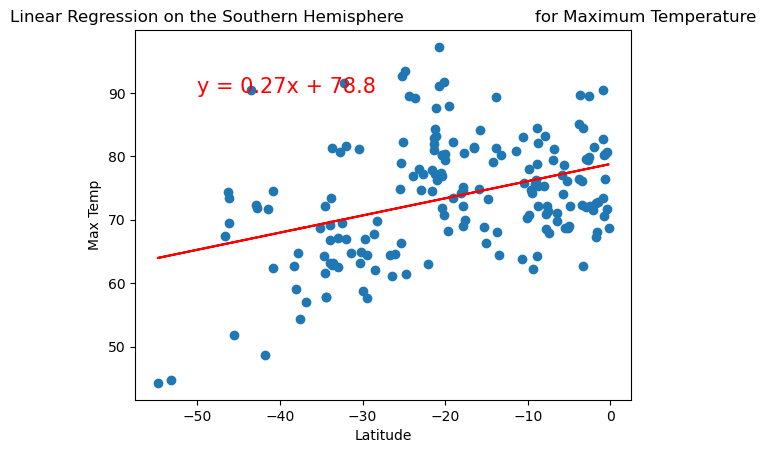

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

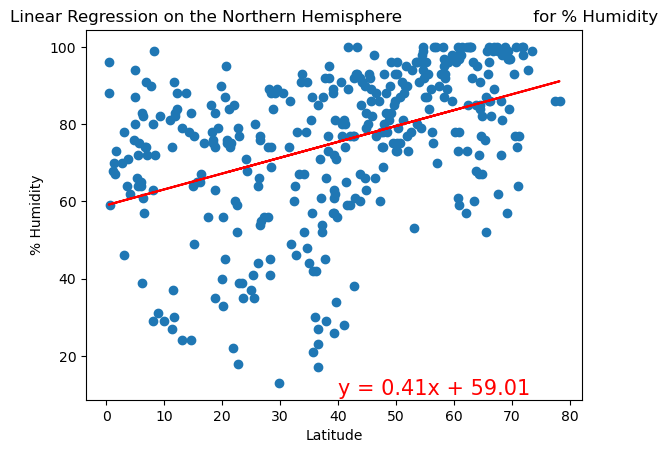

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

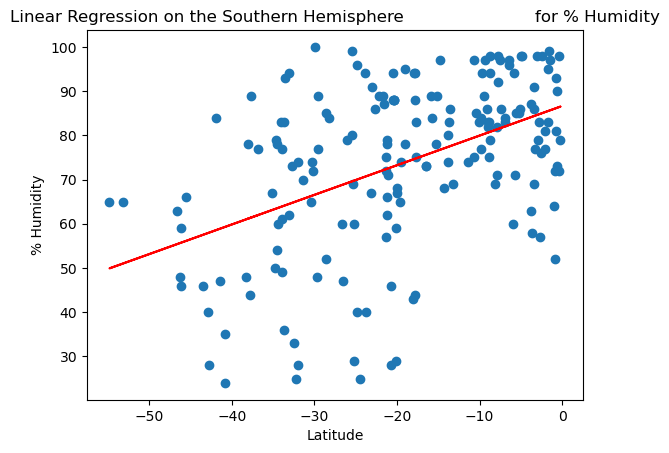

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

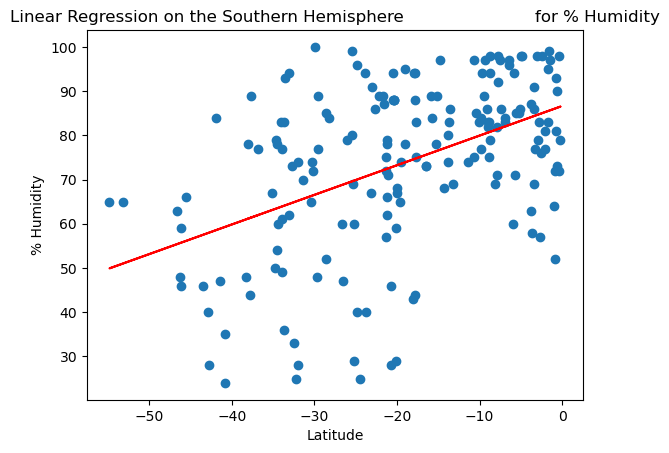

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

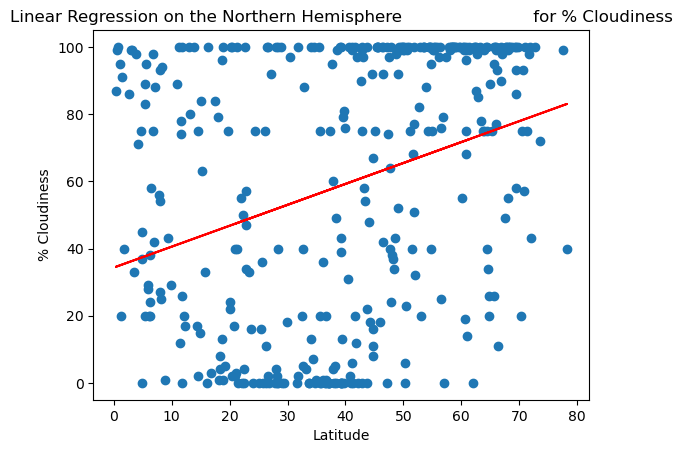

In [28]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

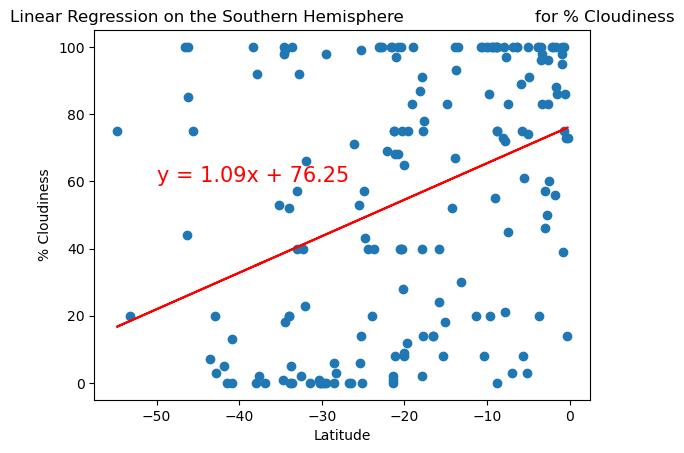

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))